In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df2018 = pd.read_csv("./2018.csv")
df2019 = pd.read_csv("./2019.csv")

First of all, we need to modify a little bit the dataframes, then we're going to get the difference dataframe and analyze it

In [104]:
print("----------------------------- 2018 -----------------------------")
print(df2018.head())


print("\n\n\n----------------------------- 2019 -----------------------------")
print(df2019.head())

----------------------------- 2018 -----------------------------
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0             

In [105]:
# remove the rank column since they are ordered from happiest to least happy
countries = df2018.loc[:, "Country or region"]
df2018 = df2018.drop(["Country or region", 'Overall rank'], 1)
df2019 = df2019.drop(["Country or region", 'Overall rank'], 1)

<ipython-input-105-d9ce9a41a436>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2018 = df2018.drop(["Country or region", 'Overall rank'], 1)
<ipython-input-105-d9ce9a41a436>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2019 = df2019.drop(["Country or region", 'Overall rank'], 1)


In [106]:
differenceDF = pd.DataFrame(df2018)
for row in range(len(df2018)):
    for column in range(0, len(df2018.loc[row])):
        differenceDF.iat[row, column] = df2019.iat[row, column] - df2018.iat[row, column]

differenceDF['Country or region'] = countries

In [107]:
# reload data
df2018 = pd.read_csv("./2018.csv")
df2019 = pd.read_csv("./2019.csv")

Now that we have the difference dataframe, we can plot the growth of the happiness indicator in different countries

1. Check the growth in percentage of the countries

Text(0, 0.5, 'Country or region')

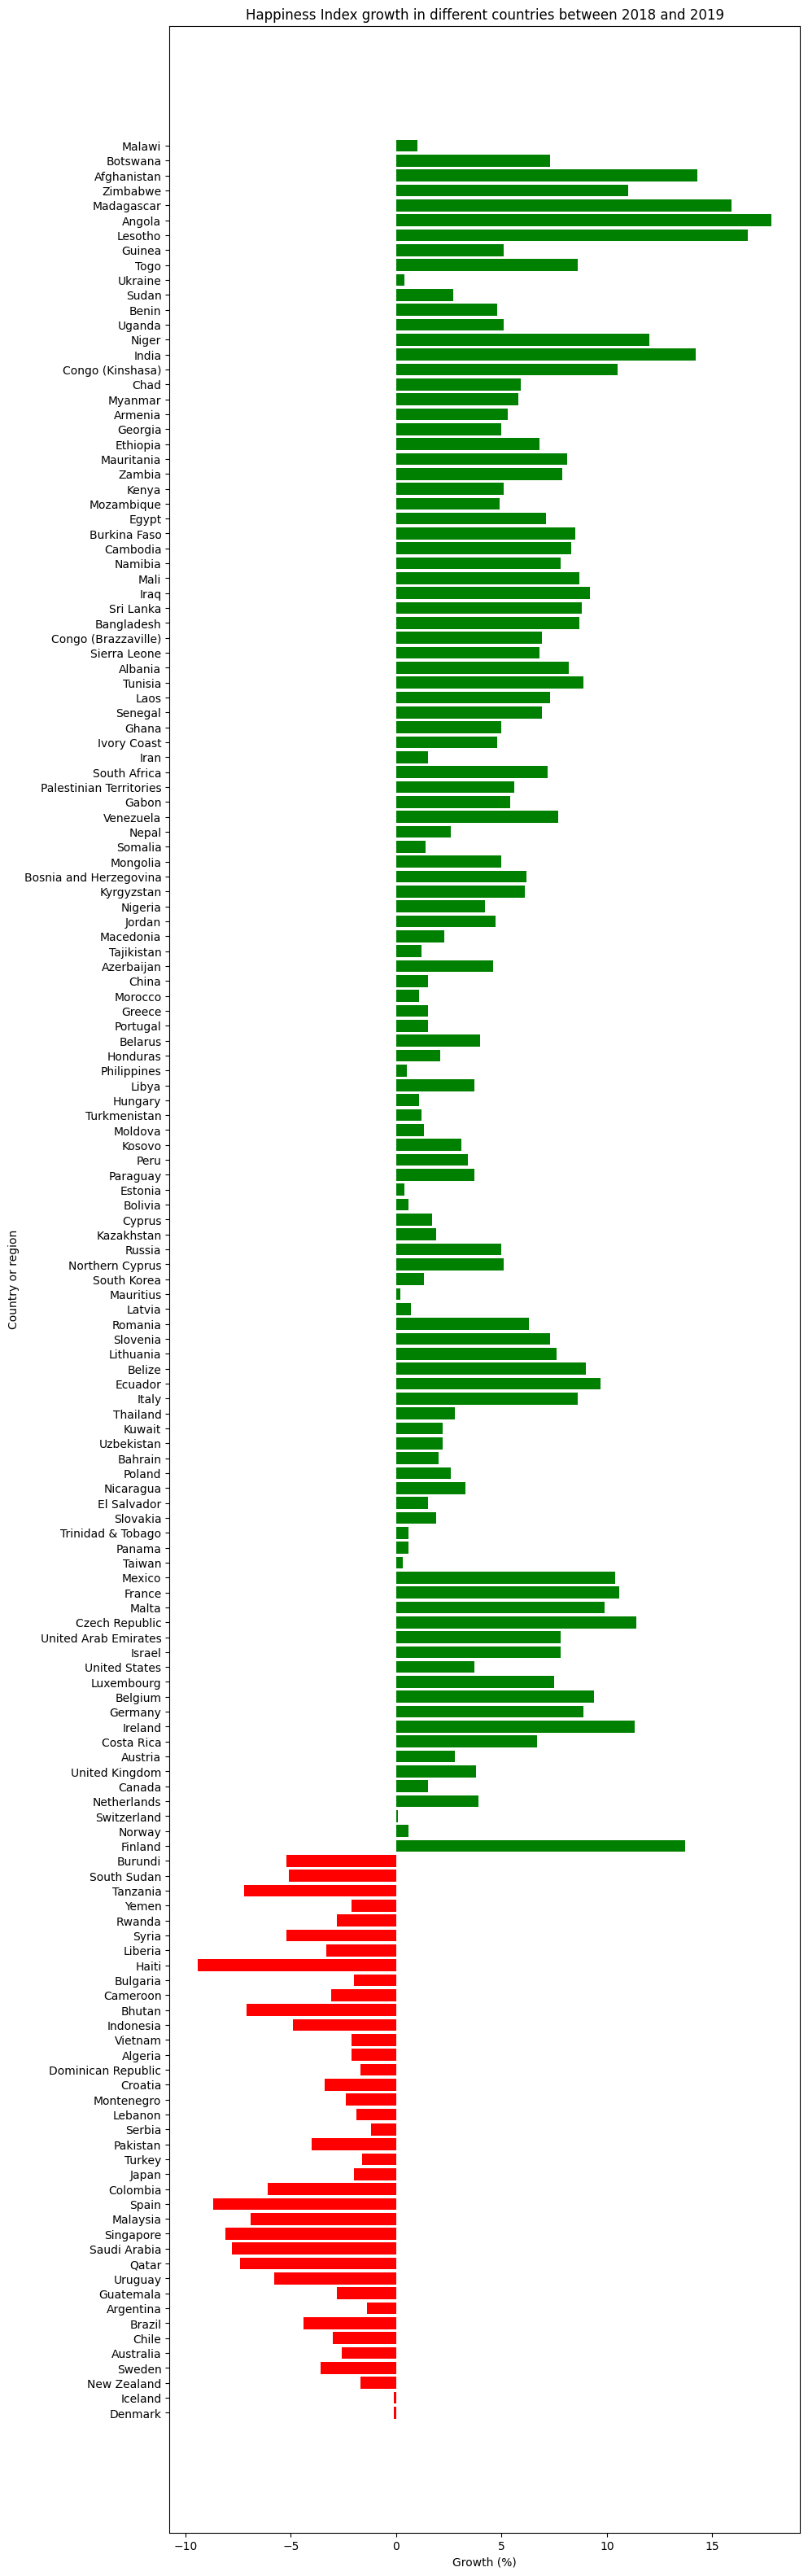

In [108]:
y = differenceDF.loc[:, 'Score']*100 # get the percentage growth
x = differenceDF.loc[:, 'Country or region']

# create masks to change colors based on values
negativeMask = y < 0
positiveMask = y > 0

plt.figure(figsize=(10, 40))
plt.barh(x[negativeMask], y[negativeMask], color = 'red')
plt.barh(x[positiveMask], y[positiveMask], color = 'green')
plt.title('Happiness Index growth in different countries between 2018 and 2019')
plt.xlabel('Growth (%)')
plt.ylabel('Country or region')

2. Group the countries by continent and make analysis on the continent

In [109]:
!pip install pycountry_convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
import pycountry_convert as pc

def country_to_continent(country_name):
    '''
        Function to get the continent from the country
    '''
    posAnd = country_name.find('&')
    if (posAnd >= 0):
        first, second = country_name.split('&')
        country_name = first + 'and' + second
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    except:
        return 'Other'
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [111]:
continents = []
for row in range(len(df2018)):
    continents.append(country_to_continent(df2018.at[row, 'Country or region']))

differenceDF['Continent'] = continents
df2018['Continent'] = continents
df2019['Continent'] = continents

Let's see a pie chart indicating which country had higher happiness index in the top 20 in both 2018 and 2019

In [112]:
def func(pct):
  return "{:1.1f}%".format(pct)

Text(0.5, 1.0, 'Continents with most countries in the top 50 in 2018')

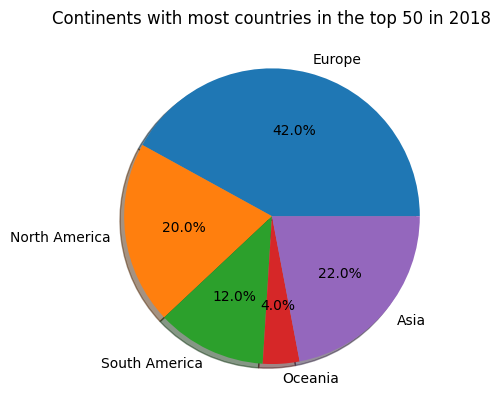

In [113]:
continents_count = {
    'Europe': 0,
    'Africa': 0,
    'North America': 0,
    'South America': 0,
    'Oceania': 0,
    'Asia': 0,
    'Other': 0
}

for row in range(50):
    continents_count[df2018.at[row, 'Continent']] += 1

x = []
y = []
for key, val in continents_count.items():
    if val > 0:
        x.append(key)
        y.append(val)

plt.pie(y, labels=x, shadow=True, autopct=lambda pct: func(pct))
plt.title("Continents with most countries in the top 50 in 2018")

In [114]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
import seaborn as sns


# create the dataframe for every continent containing the average of the values in the continent
data2018 = pd.DataFrame(columns=['Continent', 'Number of countries', 'Score', 'GDP per capita', 'Social support'])
i = 0
for row in range(len(df2018)):
    present = False
    for entry in range(i):
        if data2018.at[entry, 'Continent'] == df2018.at[row, 'Continent']:
            present = True
            data2018.at[entry, 'Number of countries'] += 1
            data2018.at[entry, 'Score'] += df2018.at[row, 'Score']
            data2018.at[entry, 'GDP per capita'] += df2018.at[row, 'GDP per capita']
            data2018.at[entry, 'Social support'] += df2018.at[row, 'Social support']
    if not present:
        data2018.loc[i, 'Continent'] = df2018.at[row, 'Continent']
        data2018.loc[i, 'Number of countries'] = 1
        data2018.loc[i, 'Score'] = df2018.at[row, 'Score']
        data2018.loc[i, 'GDP per capita'] = df2018.at[row, 'GDP per capita']
        data2018.loc[i, 'Social support'] = df2018.at[row, 'Social support']
        i+=1

for row in range(len(data2018)):
    for column in range(2, len(data2018.iloc[row])):
        data2018.iat[row, column] /= data2018.at[row, 'Number of countries']


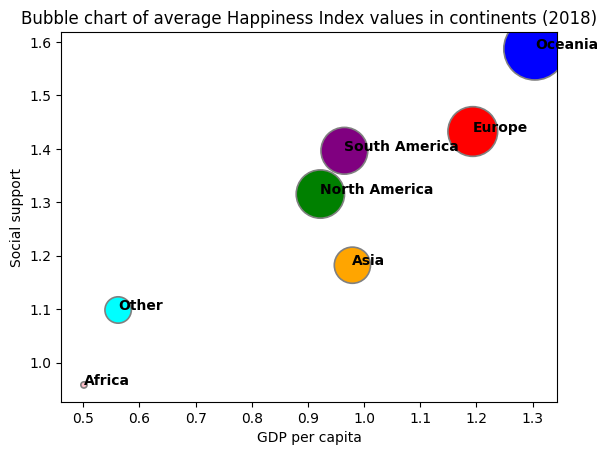

In [116]:
colormap = np.array(['red', 'green', 'blue', 'orange', 'purple', 'pink', 'cyan'])

sns.scatterplot(data=data2018, x="GDP per capita", y="Social support", size="Score", legend=False, sizes=(20, 2000), c=colormap, edgecolor='grey')

# add text
for row in range(len(data2018)):
    plt.text(x=data2018.at[row, 'GDP per capita'], y=data2018.at[row, 'Social support'], s=data2018.at[row, 'Continent'], weight='bold')
plt.title("Bubble chart of average Happiness Index values in continents (2018)")
plt.show()

We can clearly see that the Oceania is the biggest circle (so the Happiness Index Score is the highest) and is also located in the most up-right position of the chart (so has the highest values in social support and gdp per capita) <b>in average</b>

In [117]:
data2019 = pd.DataFrame(columns=['Continent', 'Number of countries', 'Score', 'GDP per capita', 'Social support'])
i = 0
for row in range(len(df2019)):
    present = False
    for entry in range(i):
        if data2019.at[entry, 'Continent'] == df2019.at[row, 'Continent']:
            present = True
            data2019.at[entry, 'Number of countries'] += 1
            data2019.at[entry, 'Score'] += df2019.at[row, 'Score']
            data2019.at[entry, 'GDP per capita'] += df2019.at[row, 'GDP per capita']
            data2019.at[entry, 'Social support'] += df2019.at[row, 'Social support']
    if not present:
        data2019.loc[i, 'Continent'] = df2019.at[row, 'Continent']
        data2019.loc[i, 'Number of countries'] = 1
        data2019.loc[i, 'Score'] = df2019.at[row, 'Score']
        data2019.loc[i, 'GDP per capita'] = df2019.at[row, 'GDP per capita']
        data2019.loc[i, 'Social support'] = df2019.at[row, 'Social support']
        i+=1

for row in range(len(data2019)):
    for column in range(2, len(data2019.iloc[row])):
        data2019.iat[row, column] /= data2019.at[row, 'Number of countries']

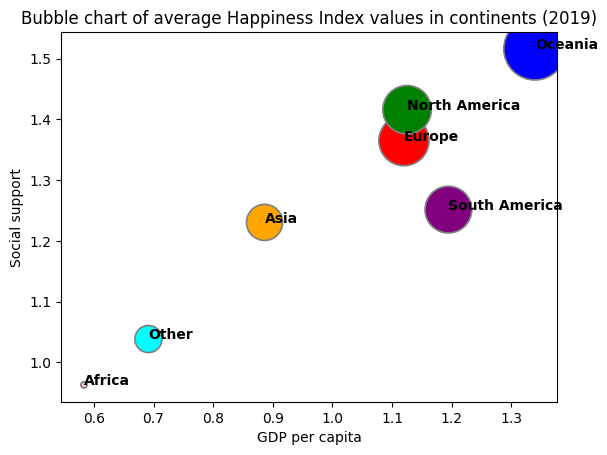

In [118]:
colormap = np.array(['red', 'green', 'blue', 'orange', 'purple', 'pink', 'cyan'])

sns.scatterplot(data=data2019, x="GDP per capita", y="Social support", size="Score", legend=False, sizes=(20, 2000), c=colormap, edgecolor='grey')

# add text
for row in range(len(data2019)):
    plt.text(x=data2019.at[row, 'GDP per capita'], y=data2019.at[row, 'Social support'], s=data2019.at[row, 'Continent'], weight='bold')

plt.title("Bubble chart of average Happiness Index values in continents (2019)")
plt.show()

We can see these changes in 2019:<br>
<ul>
    <li><b>Asia</b> increased social support but decreased GDP per capita</li>
    <li><b>South America</b> decreased social support but increased GDP per capita</li>
    <li><b>North America</b> increased both social support and GDP per capita</li>
    <li><b>Europe</b> decreased both social support and GDP per capita</li>
    <li><b>Oceania</b> and <b>Africa</b> are almost in the same position as the year before</li>
</ul>



---



Now we can build a model that uses linear regression to predict the future values of Score given the dataframe

In [ ]:
!pip install scikit-learn
!pip install sklearn

In [120]:
from sklearn.linear_model import LinearRegression as lr

# remove useless columns
df2018 = df2018.drop(columns=['Overall rank', 'Country or region'])
df2019 = df2019.drop(columns=['Overall rank', 'Country or region'])

In [121]:
# put the dataframes together
frames = [df2018, df2019]
df = pd.concat(frames)

# we have to convert the string fields (continent) to a number
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Continent'] = le.fit_transform(df['Continent'])

In [122]:
# get the X matrix and the y vector
y = df.loc[:, 'Score']
X = df.drop(columns=['Score'])

In [ ]:
# create the linear model
model = lr().fit(X, y)
print(model.score(X, y)) # ~80% score of accuracy